In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import os
os.chdir("C:/Users/Hegemon/Desktop/DSA 210 Project/Veriler")

In [99]:
fire_ratio_elaborateDF = pd.read_csv("Final Form Elaborate Fire Ratio.csv")
fire_count_elaborateDF = pd.read_csv("Final Form Elaborate Fire Count.csv")
fire_count_ratio_elaborateDF = pd.read_csv("Final Form Elaborate Fire Count Ratio.csv")
weather_yearlyDF = pd.read_csv("Final Form Elaborate Yearly Weather.csv")
weather_seasonDF = pd.read_csv("Final Form Elaborate Yearly Season Weather.csv")

In [95]:
fire_count_elaborateDF

,year,country,fire_count
0,2000,Algeria,NaN
1,2001,Algeria,NaN
2,2002,Algeria,NaN
3,2003,Algeria,NaN
4,2004,Algeria,NaN
...,...,...,...
211,2019,Turkey,2688.0
212,2020,Turkey,3399.0
213,2021,Turkey,2793.0
214,2022,Turkey,2160.0


In [100]:
fire_count_ratio_elaborateDF

,year,country,fire_incidence
0,2000,Algeria,NaN
1,2001,Algeria,NaN
2,2002,Algeria,NaN
3,2003,Algeria,NaN
4,2004,Algeria,NaN
...,...,...,...
211,2019,Turkey,0.012183
212,2020,Turkey,0.015297
213,2021,Turkey,0.012482
214,2022,Turkey,0.009586


In [101]:
elaborate_fireDF = fire_ratio_elaborateDF.merge(fire_count_elaborateDF, on=["year", "country"], how="inner")
elaborate_fireDF = elaborate_fireDF.merge(fire_count_ratio_elaborateDF, on=["year", "country"], how="inner")
elaborate_yearlyDF = elaborate_fireDF.merge(weather_yearlyDF, on=["year", "country"], how="inner")
elaborate_seasonalDF = elaborate_fireDF.merge(weather_seasonDF, on=["year", "country"], how="inner")


In [103]:
elaborate_seasonalDF

,year,country,burned_ratio,fire_count,fire_incidence,temp,wind_speed10,total_precip
0,2000,Algeria,NaN,NaN,NaN,24.445364,0.756066,0.948536
1,2001,Algeria,NaN,NaN,NaN,24.277141,0.807160,0.940279
2,2002,Algeria,NaN,NaN,NaN,23.683132,0.817672,0.969650
3,2003,Algeria,NaN,NaN,NaN,24.915958,0.697662,0.968740
4,2004,Algeria,NaN,NaN,NaN,23.209067,0.783578,1.484135
...,...,...,...,...,...,...,...,...
211,2019,Turkey,0.051359,2688.0,0.012183,23.295509,1.498378,1.631319
212,2020,Turkey,0.094377,3399.0,0.015297,23.619727,1.330505,1.440130
213,2021,Turkey,0.623439,2793.0,0.012482,23.518478,1.623147,1.087326
214,2022,Turkey,0.056803,2160.0,0.009586,23.122259,1.569037,1.676395


In [18]:
elaborate_seasonalDF

,year,country,burned_ratio,fire_count,temp,wind_speed10,total_precip
0,2000,Algeria,NaN,NaN,24.445364,0.756066,0.948536
1,2001,Algeria,NaN,NaN,24.277141,0.807160,0.940279
2,2002,Algeria,NaN,NaN,23.683132,0.817672,0.969650
3,2003,Algeria,NaN,NaN,24.915958,0.697662,0.968740
4,2004,Algeria,NaN,NaN,23.209067,0.783578,1.484135
...,...,...,...,...,...,...,...
211,2019,Turkey,0.051359,2688.0,23.295509,1.498378,1.631319
212,2020,Turkey,0.094377,3399.0,23.619727,1.330505,1.440130
213,2021,Turkey,0.623439,2793.0,23.518478,1.623147,1.087326
214,2022,Turkey,0.056803,2160.0,23.122259,1.569037,1.676395


In [19]:
elaborate_yearlyDF

,year,country,burned_ratio,fire_count,temp,wind_speed10,total_precip
0,2000,Algeria,NaN,NaN,17.139395,1.001420,2.576386
1,2001,Algeria,NaN,NaN,17.483401,1.049367,3.454161
2,2002,Algeria,NaN,NaN,17.196522,1.018191,3.621305
3,2003,Algeria,NaN,NaN,17.306887,0.998623,5.777969
4,2004,Algeria,NaN,NaN,16.704532,1.005795,5.023409
...,...,...,...,...,...,...,...
211,2019,Turkey,0.051359,2688.0,15.568469,1.138427,11.829266
212,2020,Turkey,0.094377,3399.0,15.775700,1.136894,8.922118
213,2021,Turkey,0.623439,2793.0,15.685796,1.188474,9.178751
214,2022,Turkey,0.056803,2160.0,15.207696,1.221625,8.745415


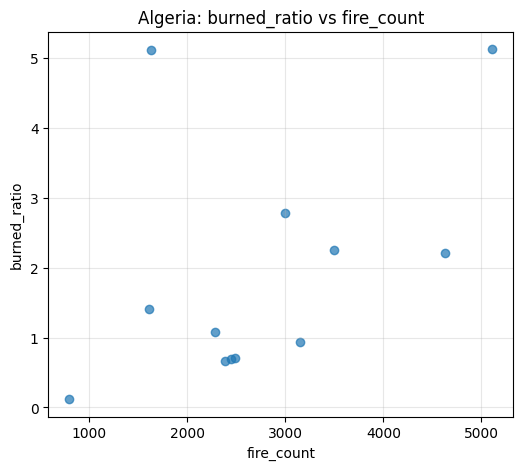

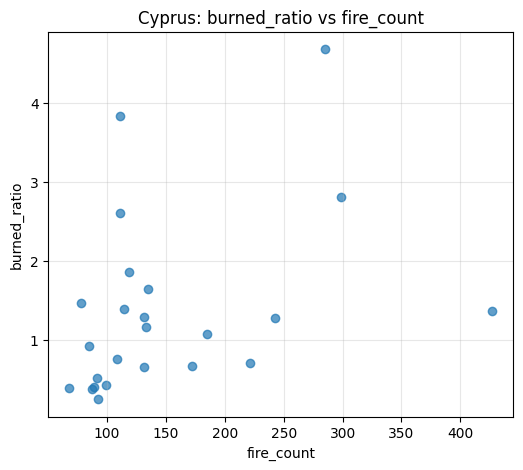

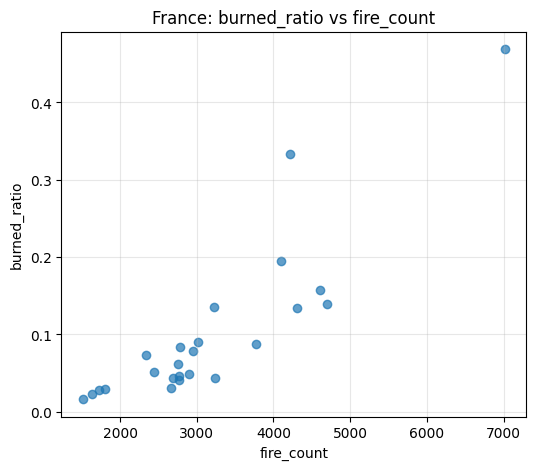

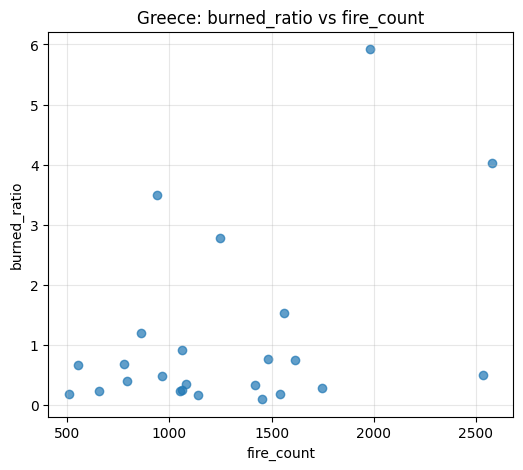

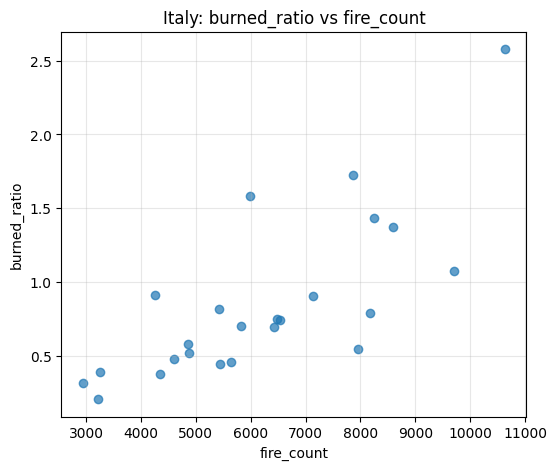

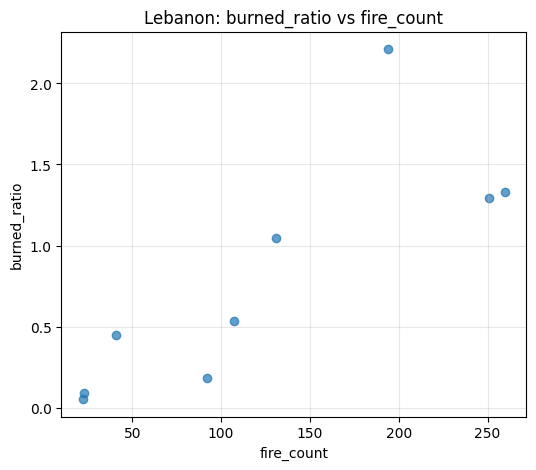

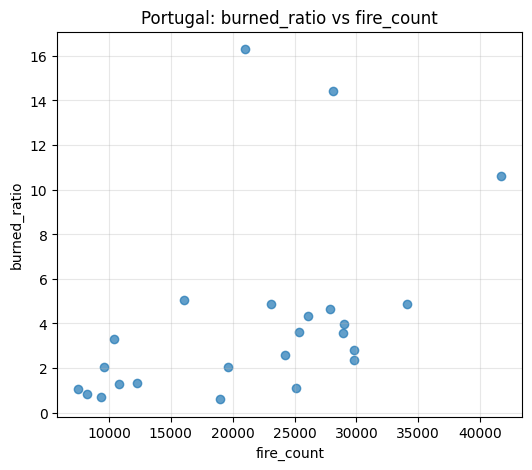

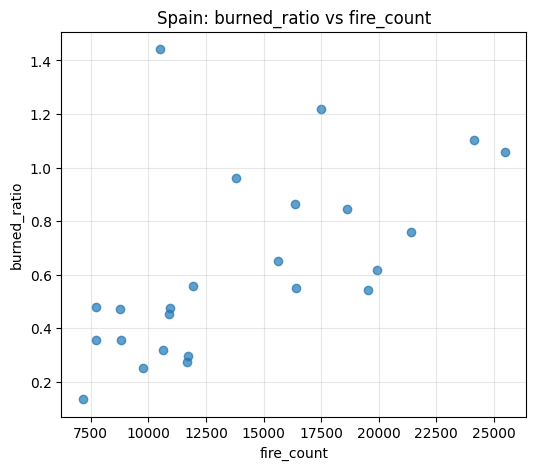

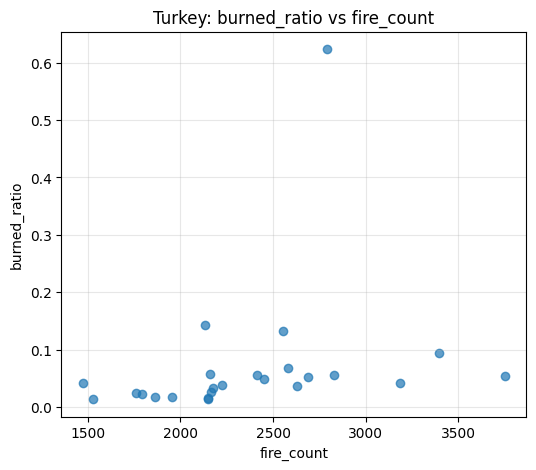

In [81]:
def generic_scatterer(df, country, x_name, y_name, log=False):

    proxdf = df[df["country"] == country].copy()

    x = proxdf[x_name]
    y = proxdf[y_name]

    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, alpha=0.7)
    plt.xlabel(f"{x_name}")
    plt.ylabel(f"{y_name}")
    plt.title(f"{country}: {y_name} vs {x_name}")
    plt.grid(alpha=0.3)

    if log == True:
        plt.xscale("log")
        plt.yscale("log")

    plt.show()

countries = sorted(elaborate_fireDF["country"].unique())
#This is the initial visualization to understand relationships
for i in countries:
    generic_scatterer(elaborate_fireDF, i, "fire_count", "burned_ratio", log=False)



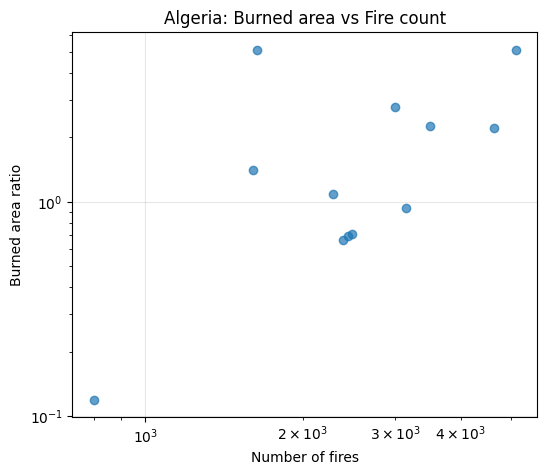

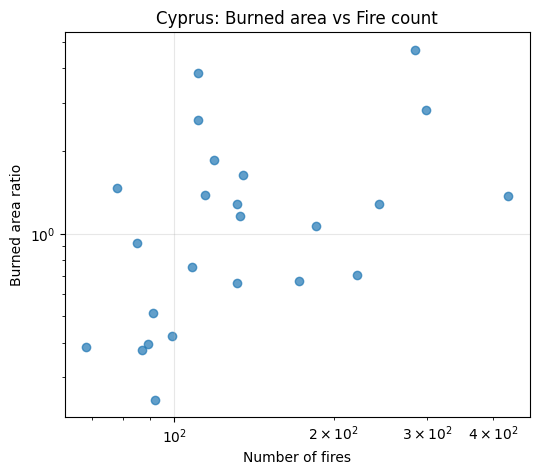

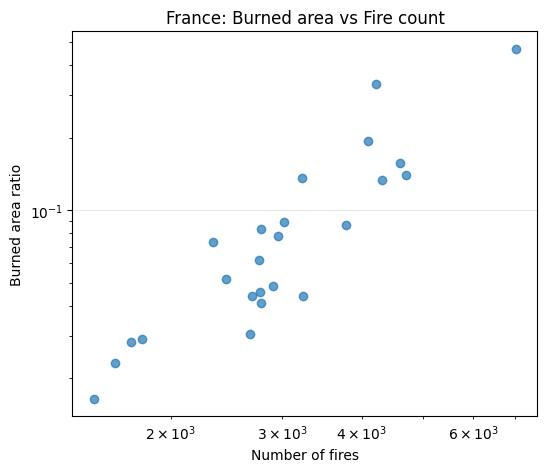

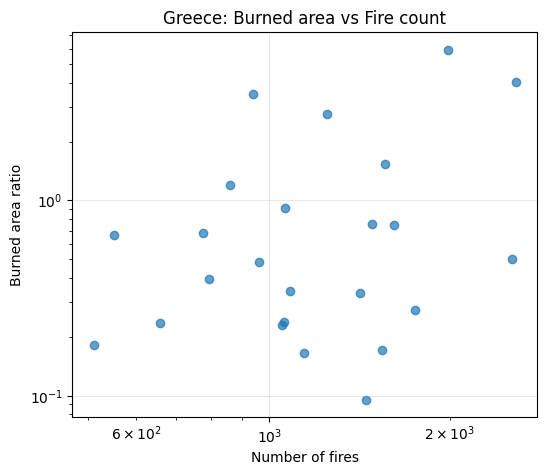

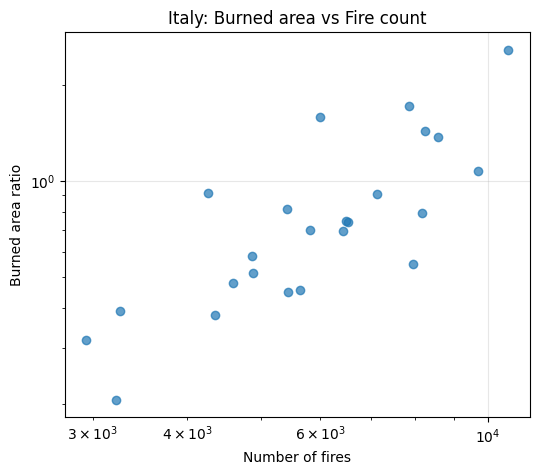

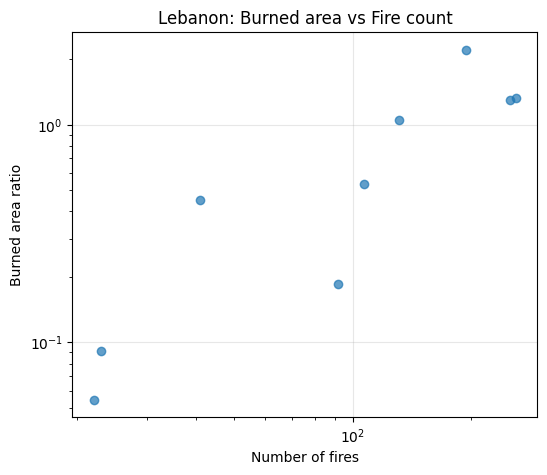

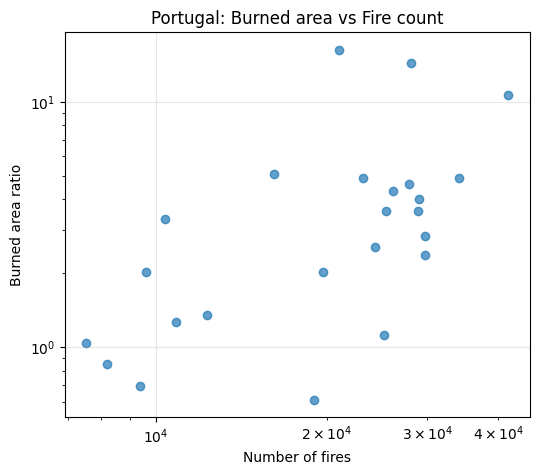

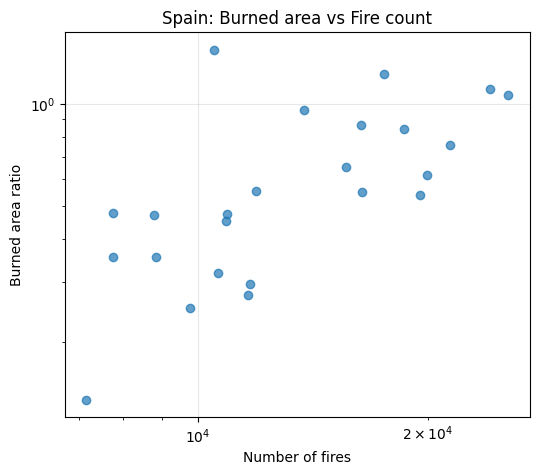

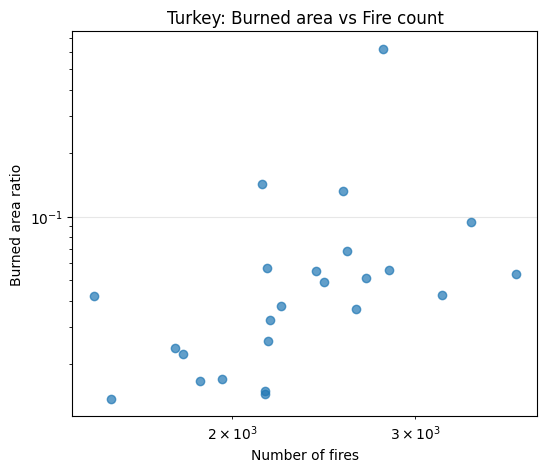

In [ ]:
# Log-scale plots are also made in order to account for high variability and extremities in normal scale
for i in countries:
    generic_scatterer(elaborate_fireDF, i, "fire_count", "burned_ratio", log=True)

After interpreting the scatter plots it is always safe to do numerical calculations. At this case I will be doing both spearman and pearson do explore monotone and linear relationships together.

In [47]:
spearman_fire = elaborate_fireDF.groupby("country")[["burned_ratio", "fire_count"]].corr(method="spearman")
pearson_fire = elaborate_fireDF.groupby("country")[["burned_ratio", "fire_count"]].corr(method="pearson")

In [48]:
spearman_fire

burned_ratio  fire_count
country                                        
Algeria  burned_ratio      1.000000    0.475524
         fire_count        0.475524    1.000000
Cyprus   burned_ratio      1.000000    0.489778
         fire_count        0.489778    1.000000
France   burned_ratio      1.000000    0.877391
         fire_count        0.877391    1.000000
Greece   burned_ratio      1.000000    0.237391
         fire_count        0.237391    1.000000
Italy    burned_ratio      1.000000    0.746957
         fire_count        0.746957    1.000000
Lebanon  burned_ratio      1.000000    0.933333
         fire_count        0.933333    1.000000
Portugal burned_ratio      1.000000    0.586087
         fire_count        0.586087    1.000000
Spain    burned_ratio      1.000000    0.660000
         fire_count        0.660000    1.000000
Turkey   burned_ratio      1.000000    0.615652
         fire_count        0.615652    1.000000

In [ ]:
count_area_DC = {"Algeria": [0.449118, 0.475524], "Cyprus":[0.378507,0.489778],"France":[0.873151,0.877391],
                 "Greece":[0.407527,0.237391], "Italy":[0.749411,0.746957],"Lebanon":[0.812588,0.933333],
                 "Portugal":[0.441873,0.586087], "Spain":[0.585560,0.660000], "Turkey":[0.259944,0.615652]}
# Country name: Pearson r, Pearson r p value, Spearman rho, Spearman rho p value

In [ ]:
plist = list()
for country, datas in elaborate_fireDF.groupby("country"):
    x = datas["fire_count"]
    y = datas["burned_ratio"]

    p,pp =pearsonr(x,y,)
    s,sp = spearmanr(x,y)

    plist.append([pp,sp])

plist
#p-values seems fine to  trust the findings generally

[[np.float64(nan), nan],
 [np.float64(0.06817461309945969), np.float64(0.01512547012831834)],
 [np.float64(2.5923861986092477e-08), np.float64(1.8204279591228982e-08)],
 [np.float64(0.04808052331526812), np.float64(0.26401496121383244)],
 [np.float64(2.5019164901386334e-05), np.float64(2.7501839192801746e-05)],
 [np.float64(nan), nan],
 [np.float64(0.030630108243151547), np.float64(0.0026160096152165265)],
 [np.float64(0.002645167114258647), np.float64(0.0004494019078104929)],
 [np.float64(0.2199351265487503), np.float64(0.0013622133102574477)]]

In [49]:
pearson_fire

burned_ratio  fire_count
country                                        
Algeria  burned_ratio      1.000000    0.449118
         fire_count        0.449118    1.000000
Cyprus   burned_ratio      1.000000    0.378507
         fire_count        0.378507    1.000000
France   burned_ratio      1.000000    0.873151
         fire_count        0.873151    1.000000
Greece   burned_ratio      1.000000    0.407527
         fire_count        0.407527    1.000000
Italy    burned_ratio      1.000000    0.749411
         fire_count        0.749411    1.000000
Lebanon  burned_ratio      1.000000    0.812588
         fire_count        0.812588    1.000000
Portugal burned_ratio      1.000000    0.441873
         fire_count        0.441873    1.000000
Spain    burned_ratio      1.000000    0.585560
         fire_count        0.585560    1.000000
Turkey   burned_ratio      1.000000    0.259944
         fire_count        0.259944    1.000000

With all these in mind it seems safe to conclude that fire count cannot be assigned as a parameter that can be used globally to calculate total burnt area ratio, but it is safe to claim that for some countries it shows a strong correlation.

Now moving onto weather:

<Figure size 1200x500 with 0 Axes>

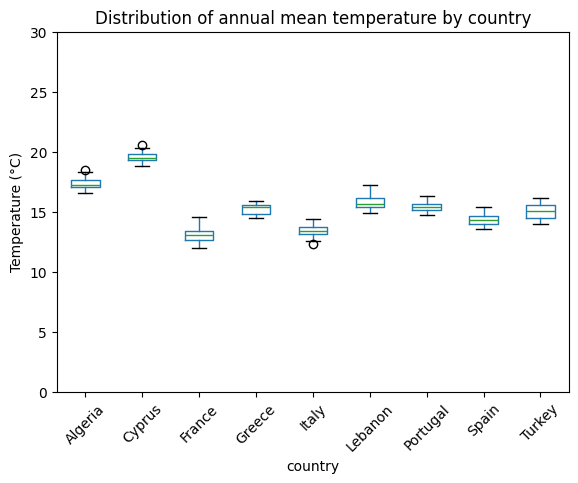

In [71]:
plt.figure(figsize=(12,5))
elaborate_yearlyDF.boxplot(column="temp", by="country", grid=False)
plt.title("Distribution of annual mean temperature by country")
plt.suptitle("")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=30)
plt.show()

<Figure size 1200x500 with 0 Axes>

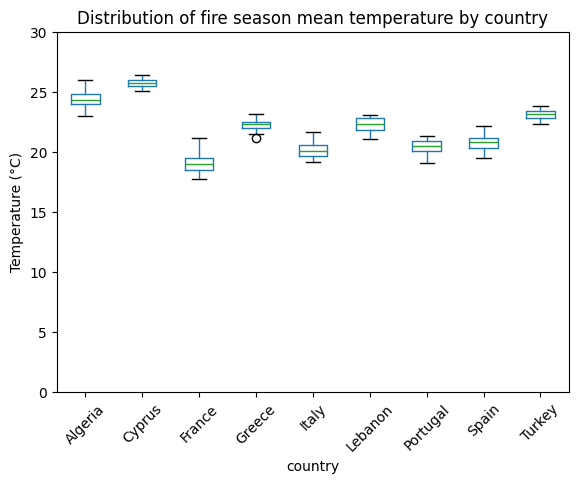

In [73]:
plt.figure(figsize=(12,5))
elaborate_seasonalDF.boxplot(column="temp", by="country", grid=False)
plt.title("Distribution of fire season mean temperature by country")
plt.suptitle("")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=30)
plt.show()

In [83]:
elaborate_seasonalDF

,year,country,burned_ratio,fire_count,temp,wind_speed10,total_precip
0,2000,Algeria,NaN,NaN,24.445364,0.756066,0.948536
1,2001,Algeria,NaN,NaN,24.277141,0.807160,0.940279
2,2002,Algeria,NaN,NaN,23.683132,0.817672,0.969650
3,2003,Algeria,NaN,NaN,24.915958,0.697662,0.968740
4,2004,Algeria,NaN,NaN,23.209067,0.783578,1.484135
...,...,...,...,...,...,...,...
211,2019,Turkey,0.051359,2688.0,23.295509,1.498378,1.631319
212,2020,Turkey,0.094377,3399.0,23.619727,1.330505,1.440130
213,2021,Turkey,0.623439,2793.0,23.518478,1.623147,1.087326
214,2022,Turkey,0.056803,2160.0,23.122259,1.569037,1.676395


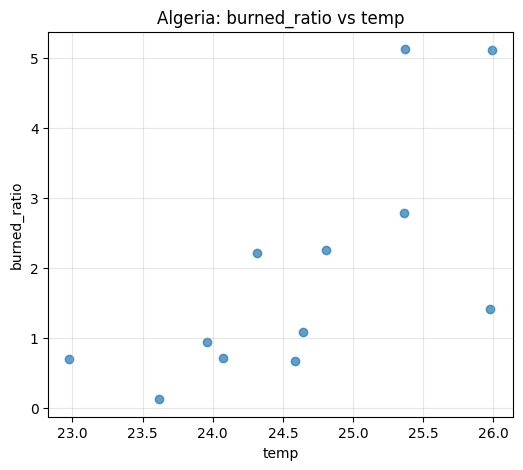

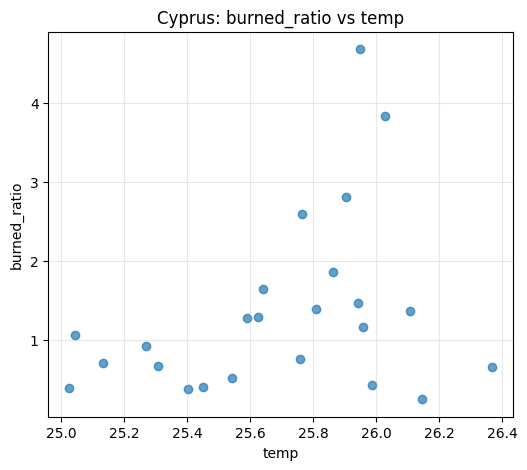

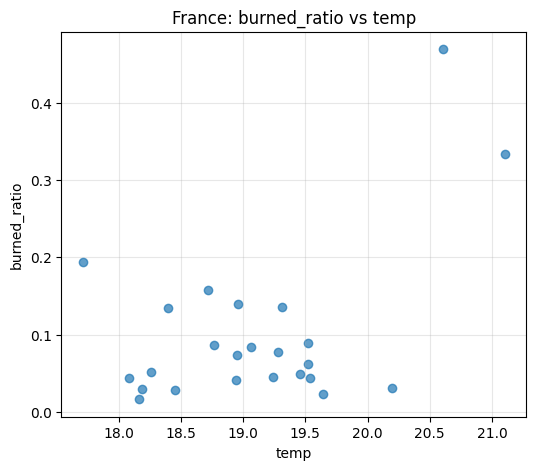

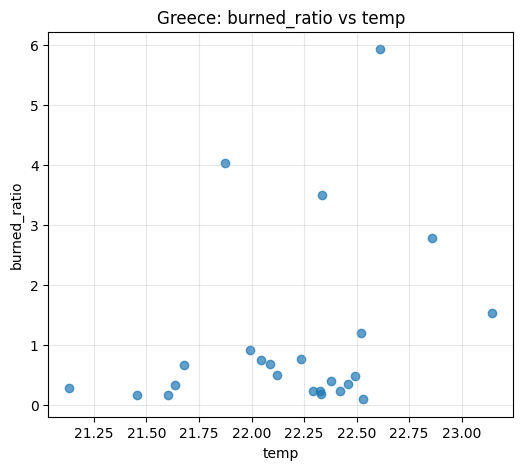

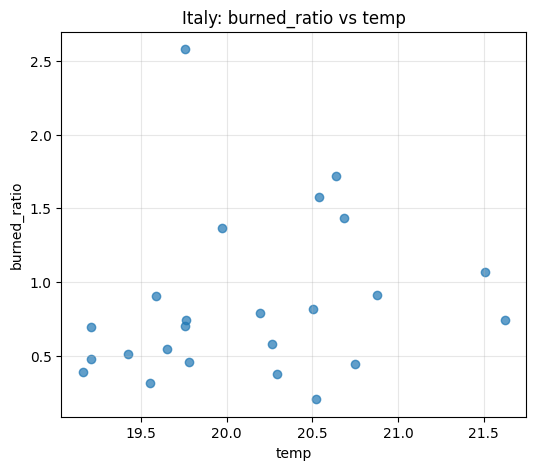

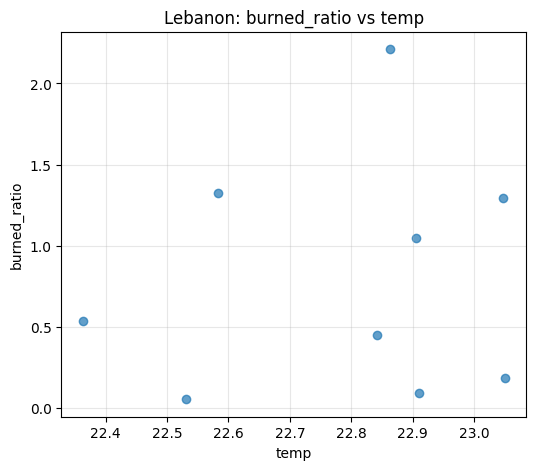

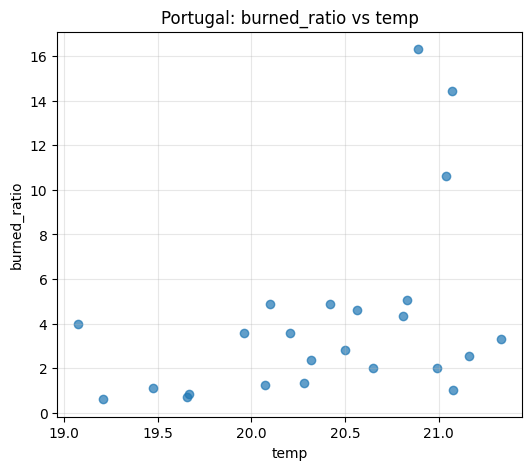

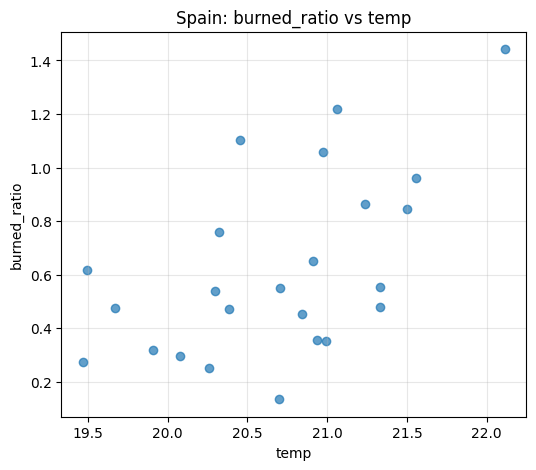

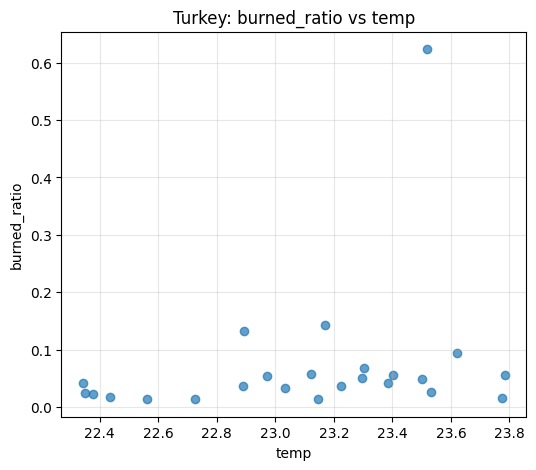

In [108]:
for i in countries:
    generic_scatterer(elaborate_seasonalDF, i, "temp", "burned_ratio", log=False)

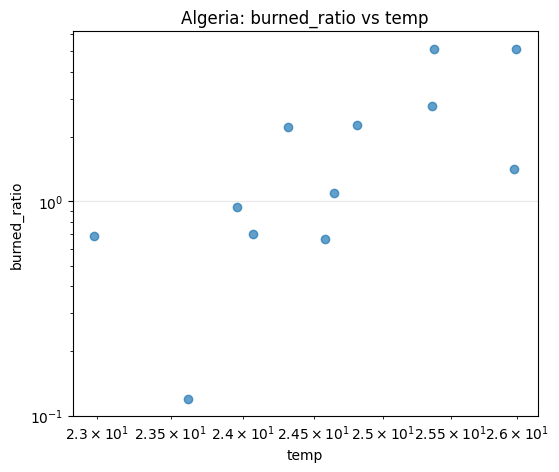

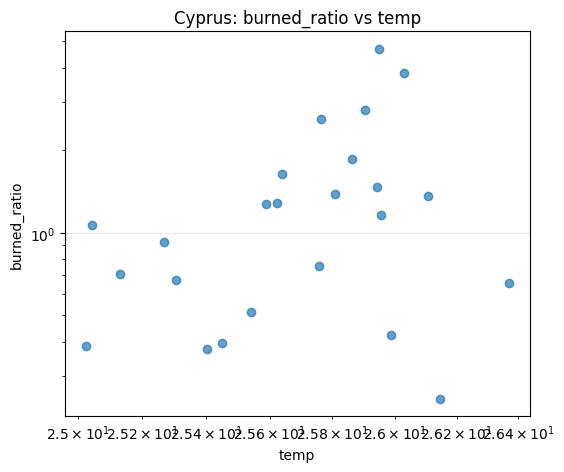

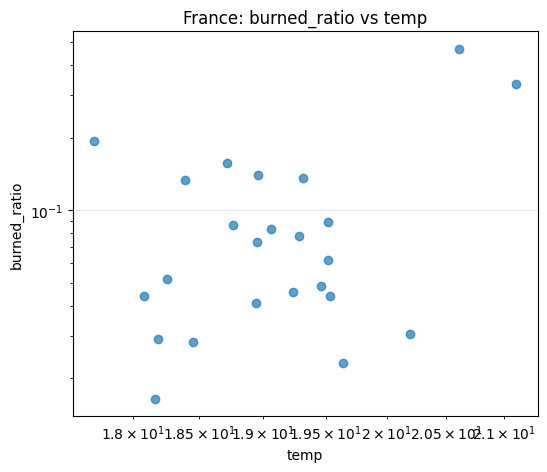

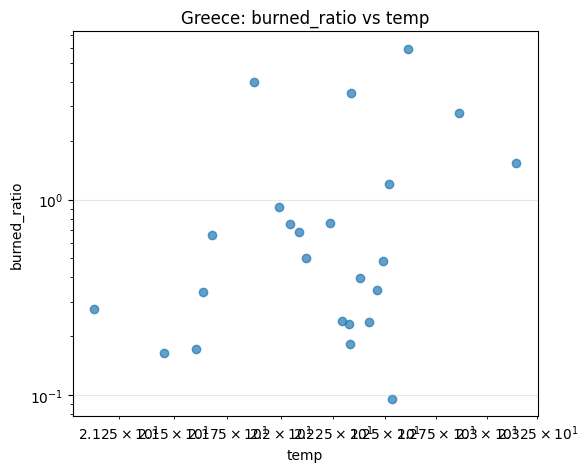

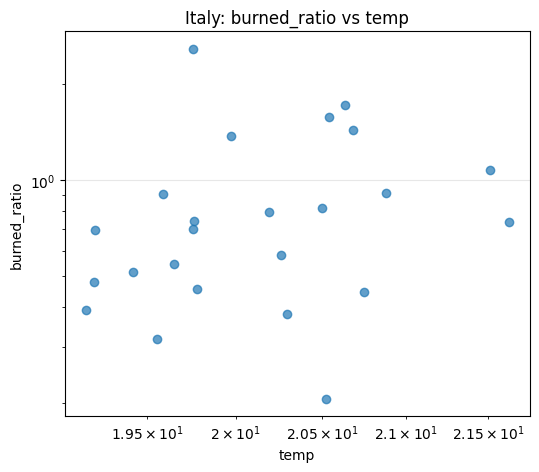

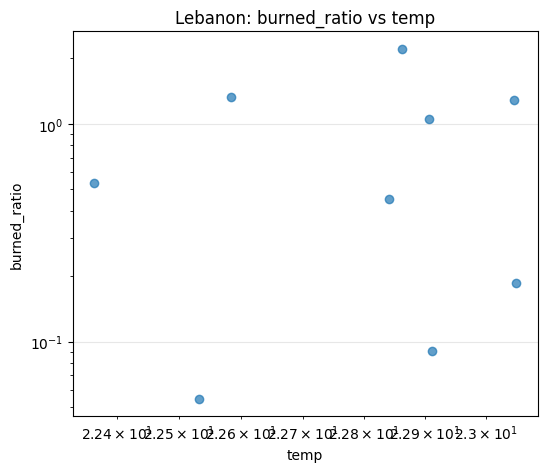

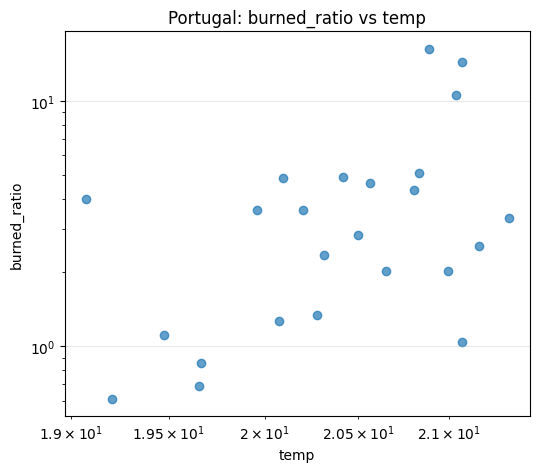

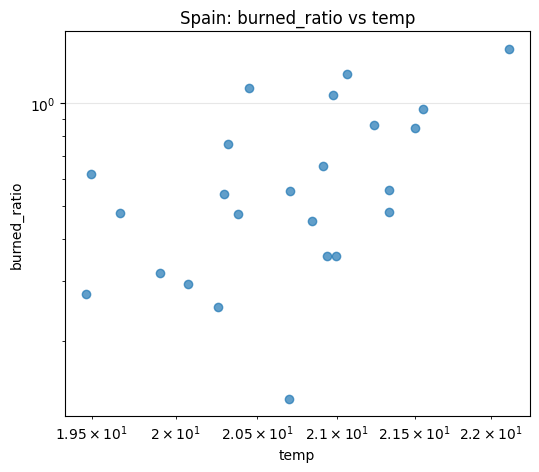

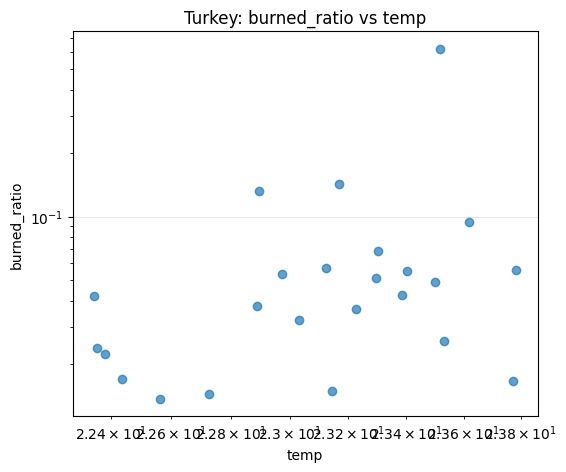

In [109]:
for i in countries:
    generic_scatterer(elaborate_seasonalDF, i, "temp", "burned_ratio", log=True)

Temperature didn't seem to be very well correlated with burnt area(total destruction). It seems fine to check for fire_incidence since I expect temperature to change something, maybe it increases the count more consistently

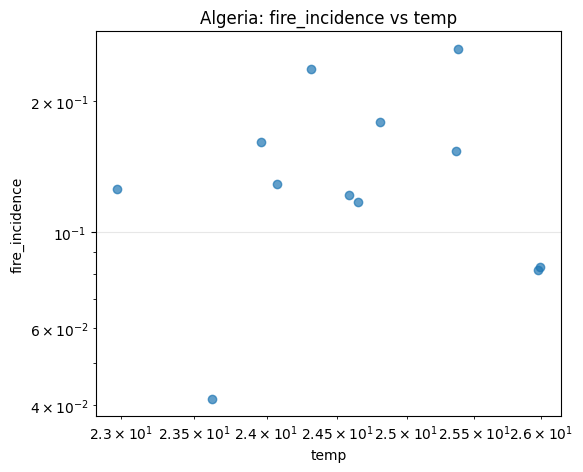

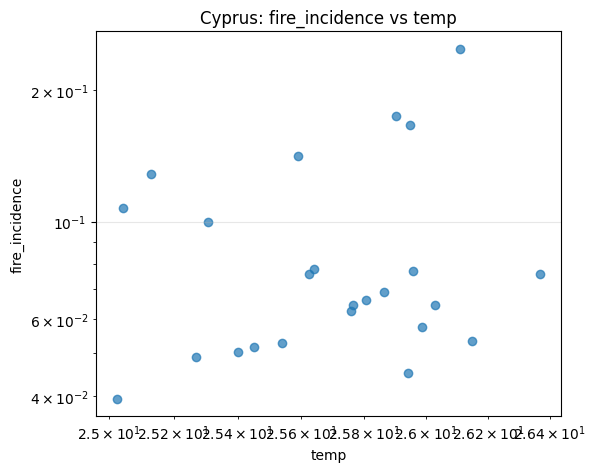

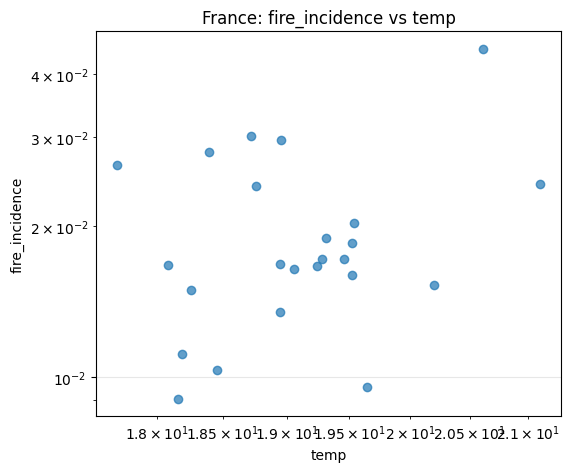

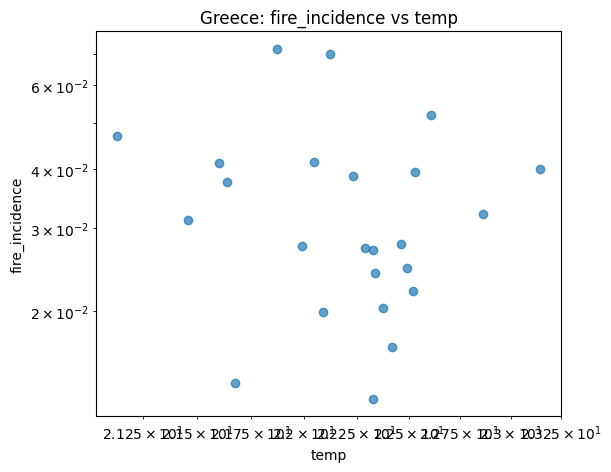

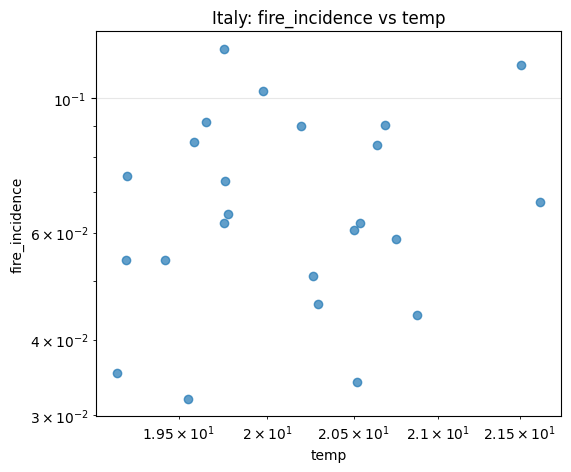

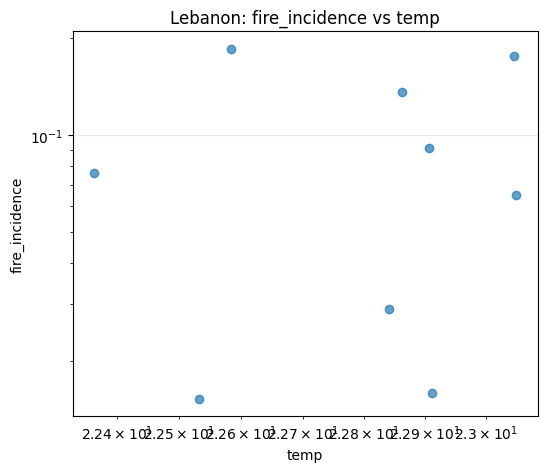

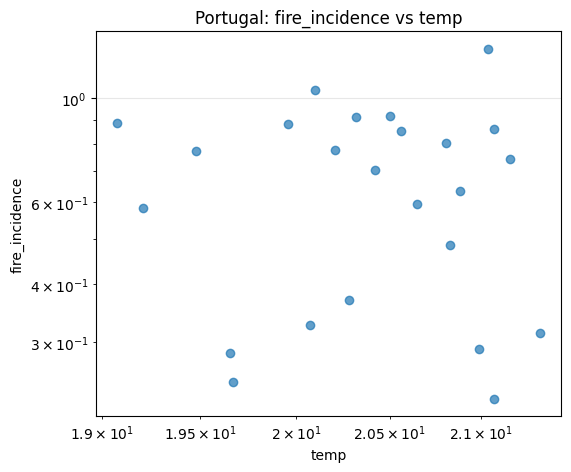

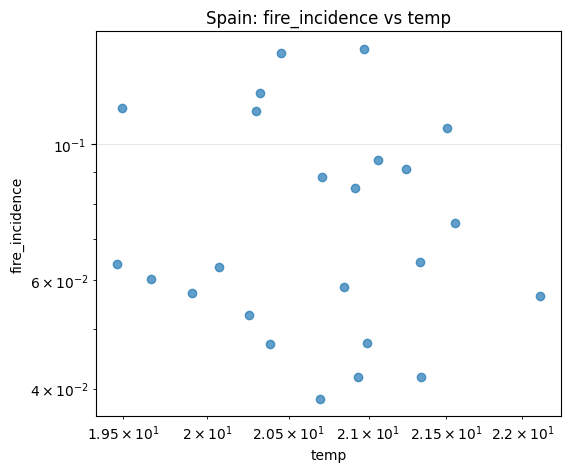

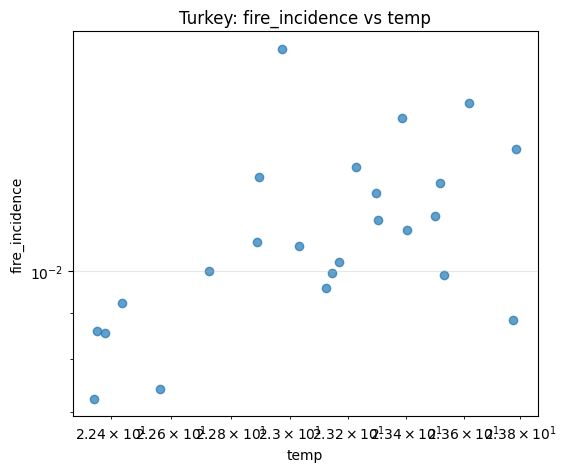

In [113]:
for i in countries:
    generic_scatterer(elaborate_seasonalDF, i, "temp", "fire_incidence", log=True)

In [26]:
elaborate_yearlyDF.groupby("country")[["burned_ratio", "temp", "total_precip", "wind_speed10"]].corr(method="spearman").iloc[:,0]

country               
Algeria   burned_ratio    1.000000
          temp            0.643357
          total_precip   -0.594406
          wind_speed10   -0.251748
Cyprus    burned_ratio    1.000000
          temp            0.120000
          total_precip   -0.235652
          wind_speed10    0.166957
France    burned_ratio    1.000000
          temp           -0.060000
          total_precip   -0.247826
          wind_speed10   -0.393043
Greece    burned_ratio    1.000000
          temp            0.258261
          total_precip   -0.332174
          wind_speed10    0.060000
Italy     burned_ratio    1.000000
          temp            0.005217
          total_precip   -0.523478
          wind_speed10    0.352174
Lebanon   burned_ratio    1.000000
          temp           -0.050000
          total_precip    0.533333
          wind_speed10    0.500000
Portugal  burned_ratio    1.000000
          temp            0.031304
          total_precip    0.060870
          wind_speed10   -0.3617

In [22]:
elaborate_seasonalDF.groupby("country")[["burned_ratio", "temp", "total_precip", "wind_speed10"]].corr(method="spearman")

burned_ratio      temp  total_precip  wind_speed10
country                                                                  
Algeria  burned_ratio      1.000000  0.797203     -0.797203     -0.377622
         temp              0.797203  1.000000     -0.566087     -0.343478
         total_precip     -0.797203 -0.566087      1.000000      0.100000
         wind_speed10     -0.377622 -0.343478      0.100000      1.000000
Cyprus   burned_ratio      1.000000  0.308696     -0.180000     -0.133913
         temp              0.308696  1.000000     -0.176522     -0.252174
         total_precip     -0.180000 -0.176522      1.000000      0.134783
         wind_speed10     -0.133913 -0.252174      0.134783      1.000000
France   burned_ratio      1.000000  0.177391     -0.386957     -0.335652
         temp              0.177391  1.000000     -0.346087     -0.568696
         total_precip     -0.386957 -0.346087      1.000000      0.408696
         wind_speed10     -0.335652 -0.568696      0.408696      1.000000
Greece   burned_ratio      1.000000  0.290435     -0.341739      0.283478
         temp              0.290435  1.000000     -0.166957      0.327826
         total_precip     -0.341739 -0.166957      1.000000      0.005217
         wind_speed10      0.283478  0.327826      0.005217      1.000000
Italy    burned_ratio      1.000000  0.356522     -0.510435      0.424348
         temp              0.356522  1.000000     -0.271304     -0.131304
         total_precip     -0.510435 -0.271304      1.000000      0.048696
         wind_speed10      0.424348 -0.131304      0.048696      1.000000
Lebanon  burned_ratio      1.000000  0.000000     -0.200000      0.300000
         temp              0.000000  1.000000     -0.146087     -0.117391
         total_precip     -0.200000 -0.146087      1.000000      0.180870
         wind_speed10      0.300000 -0.117391      0.180870      1.000000
Portugal burned_ratio      1.000000  0.409565     -0.409565     -0.267826
         temp              0.409565  1.000000     -0.488696     -0.485217
         total_precip     -0.409565 -0.488696      1.000000      0.165217
         wind_speed10     -0.267826 -0.485217      0.165217      1.000000
Spain    burned_ratio      1.000000  0.558261     -0.520870     -0.234783
         temp              0.558261  1.000000     -0.519130     -0.254783
         total_precip     -0.520870 -0.519130      1.000000      0.144348
         wind_speed10     -0.234783 -0.254783      0.144348      1.000000
Turkey   burned_ratio      1.000000  0.412174     -0.365217      0.470435
         temp              0.412174  1.000000     -0.031304     -0.106957
         total_precip     -0.365217 -0.031304      1.000000     -0.410435
         wind_speed10      0.470435 -0.106957     -0.410435      1.000000